<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Preparaci%C3%B3n_Examen_Unidad_Simulaci%C3%B3n_del_Examen_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulación del Examen (Core)**
**Fundamentos de Data Science – Práctica para el Examen**

**Contexto:**

La tarea es limpiar y explorar los datos para una compañía de tecnología emergente que desarrolla aplicaciones móviles. La empresa quiere mejorar la experiencia del usuario y aumentar la retención de usuarios en sus aplicaciones. Han recolectado datos sobre el uso de sus aplicaciones y quieren entender mejor cómo los usuarios interactúan con sus productos.

**Requisitos:**

**1) Limpieza de Datos:**

El primer paso en este proceso es usar Python para limpiar los datos y dejarlos listos para el análisis. Deben:

* **Identificar y abordar cualquier valor duplicado.**
* **Identificar y abordar cualquier dato que falte en este conjunto de datos.** Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.
* **Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.**
* **Identificar y abordar cualquier inconsistencia en los valores categóricos** (ejemplo: android, Android, ANDROID).
* **Identificar y abordar cualquier punto de datos inapropiados o inusuales**(ejemplo: tiempo de uso de 10000 horas en una semana).

**2) Exploración de Datos:**

El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:

* **Dos tipos diferentes de visualizaciones exploratorias univariantes**. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* **Dos tipos diferentes de visualizaciones exploratorias multivariantes.** Cada visualización debe incluir una breve interpretación dentro del archivo de código.

**Diccionario de Datos:**

* **user_id:** Identificación única del usuario.
* **app_version:** Versión de la aplicación usada.
* **platform:** Plataforma del dispositivo (Android, iOS).
* **session_duration:** Duración de la sesión en minutos.
* **number_of_sessions:** Número de sesiones en un día.
* **country:** País del usuario.
* **user_feedback:** Puntuación de la experiencia del usuario (1-5).

 **Codigo para generar los datos**

In [4]:
import pandas as pd
import numpy as np
import random

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


In [5]:
# Importación del CSV
df = pd.read_csv('user_app_data.csv')

In [6]:
# Identificación de duplicados
duplicados = df.duplicated()
print(f"Duplicados encontrados: {duplicados.sum()}")


Duplicados encontrados: 0


In [ ]:
# Eliminación de duplicados
df = df.drop_duplicates()

In [16]:
# Identificación de valores faltantes
faltantes = df.isnull().sum()
print(f"Valores faltantes:\n{faltantes}")

# Rellenamos con la mediana para columnas numéricas y con la moda para columnas categóricas.
for column in df.select_dtypes(include=[np.number]).columns:
    df[column] = df[column].fillna(df[column].median())

for column in df.select_dtypes(include=[object]).columns:
    df[column] = df[column].fillna(df[column].mode()[0])

Valores faltantes:
user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64


In [8]:
# Verificación de Datos
df['user_id'] = df['user_id'].astype(int)
df['app_version'] = df['app_version'].astype(str)
df['platform'] = df['platform'].astype(str)
df['session_duration'] = df['session_duration'].astype(int)
df['number_of_sessions'] = df['number_of_sessions'].astype(int)
df['country'] = df['country'].astype(str)
df['user_feedback'] = df['user_feedback'].astype(int)

In [9]:
# Pasar todo a minúsculas para evitar inconsistencias
df['platform'] = df['platform'].str.lower()
df['country'] = df['country'].str.title()

In [10]:
# Identificación de valores inusuales en "session_duration"
df = df[df['session_duration'] <= 1440]  # Máx. 24 horas por sesión
# Los valores de "session_duration" mayores a 1440 min. (24 horas) se eliminan.

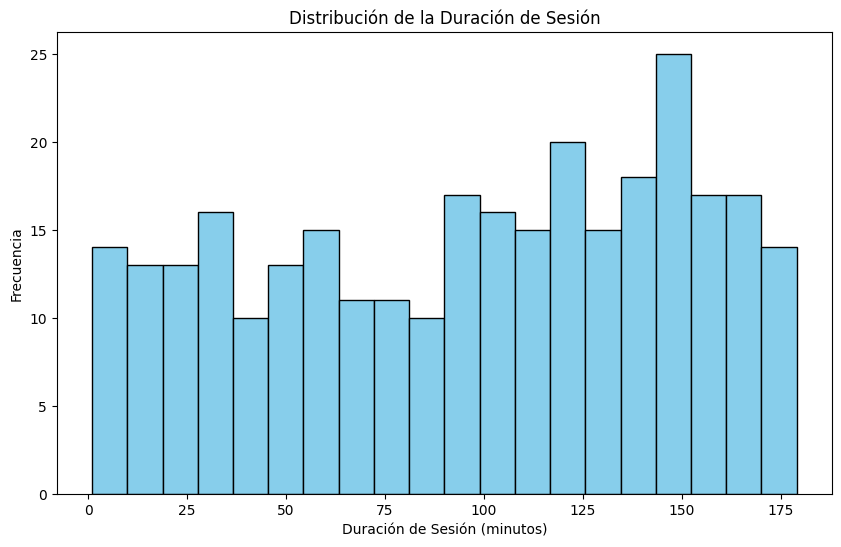

In [11]:
# Histograma de Duración de las sesiones
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['session_duration'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribución de la Duración de Sesión")
plt.xlabel("Duración de Sesión (minutos)")
plt.ylabel("Frecuencia")
plt.show()

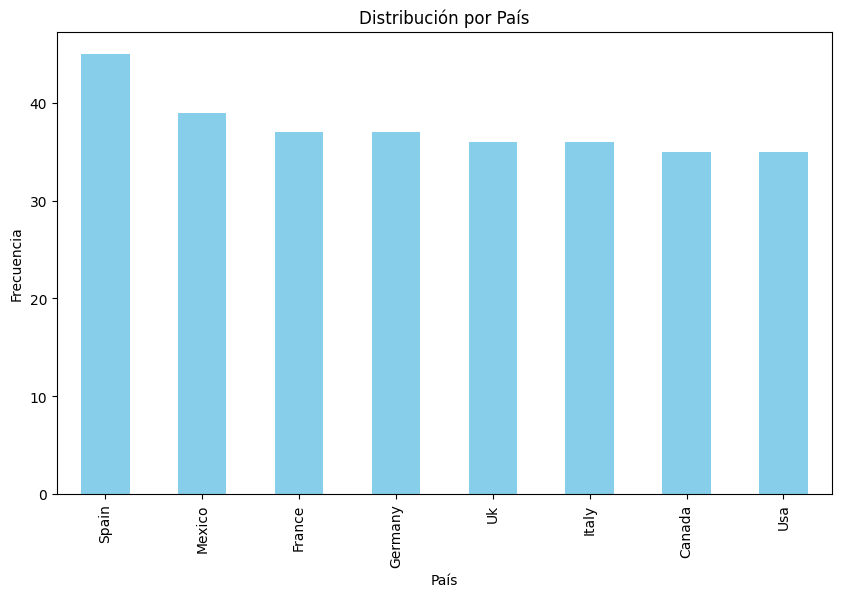

In [20]:
# Grafico de Barras de Paises
plt.figure(figsize=(10, 6))
df['country'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribución por País")
plt.xlabel("País")
plt.ylabel("Frecuencia")
plt.show()

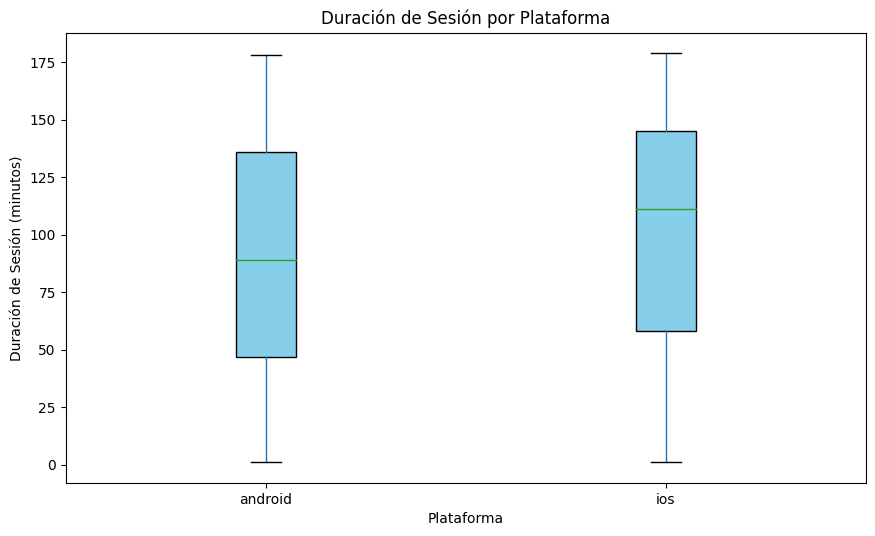

In [29]:
# Boxplot de Duración de Sesión por Plataforma
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='session_duration', by='platform', grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'), ax=ax)
plt.title("Duración de Sesión por Plataforma")
plt.suptitle('')
plt.xlabel("Plataforma")
plt.ylabel("Duración de Sesión (minutos)")
plt.show()

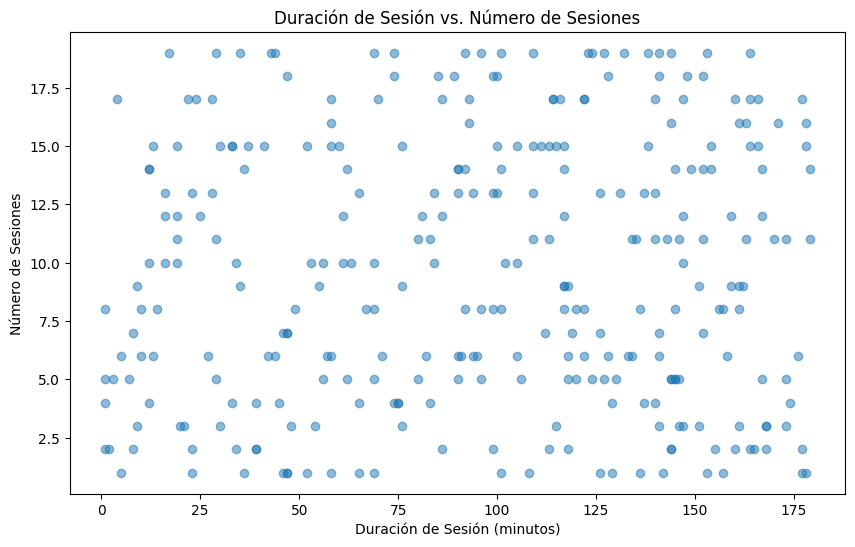

In [26]:
# Gráfico de Dispersión de Duración de Sesión vs. Número de Sesiones
plt.figure(figsize=(10, 6))
plt.scatter(df['session_duration'], df['number_of_sessions'], alpha=0.5)
plt.title("Duración de Sesión vs. Número de Sesiones")
plt.xlabel("Duración de Sesión (minutos)")
plt.ylabel("Número de Sesiones")
plt.show()